In [28]:
# import os
# import librosa
# import numpy as np

# # Define audio feature parameters
# sample_rate = 22050  # Adjust as needed
# duration = 3  # Duration of audio clips in seconds
# hop_length = 512  # Hop length for feature extraction
# n_mfcc = 13  # Number of MFCC coefficients
# num_classes = len(df['labels'].unique())  # Assuming labels are stored in a 'labels' column

# # Initialize empty arrays to store features and labels
# X = []
# y = []

# # Iterate through DataFrame rows and preprocess audio
# for index, row in df.iterrows():
#     audio_file_path = row['audio_file']
#     label = row['labels']

#     # Load the audio file
#     audio, _ = librosa.load(audio_file_path, sr=sample_rate, duration=duration)

#     # Extract audio features (e.g., MFCCs)
#     mfccs = librosa.feature.mfcc(audio, sr=sample_rate, n_mfcc=n_mfcc, hop_length=hop_length)

#     # Append the features and labels to the arrays
#     X.append(mfccs.T)  # Transpose for proper shape
#     y.append(label)

# # Convert lists to NumPy arrays
# X = np.array(X)
# y = np.array(y)

# # Print the shapes of the datasets
# print("X shape:", X.shape)
# print("y shape:", y.shape)


In [2]:
import os
import pandas as pd
import librosa
import numpy as np

In [3]:

df=pd.read_csv("dataset_file_directory.csv")

In [23]:
firsthunderd=df.head(1000)

In [24]:
firsthunderd.shape

(1000, 3)

In [40]:
firsthunderd

,Filename,Participant,Label
0,200126_2142_00-13-04.06--00-13-04.324.wav,P01,dysregulation-sick
1,200126_2142_00-06-41.54--00-06-42.47.wav,P01,dysregulation-sick
2,200126_2142_00-11-35.94--00-11-37.08.wav,P01,dysregulation-sick
3,200126_2142_00-12-11.66--00-12-15.31.wav,P01,dysregulation-sick
4,200126_2142_00-00-24.55--00-00-24.95.wav,P01,dysregulation-sick
...,...,...,...
995,200306_2024_00-07-52.73--00-07-53.03.wav,P01,selftalk
996,200306_2024_00-00-36.3--00-00-37.6.wav,P01,selftalk
997,200229_2244_00-02-41.98--00-02-42.38.wav,P01,selftalk
998,210113_2220_00-00-54.22--00-00-55.8.wav,P01,selftalk


In [28]:

# Specify the directory where your Python script is located
script_dir = r"C:\Users\pawan\Desktop\mv\downloaddataset"
# Define the relative path to the WAV files directory
wav_dir = os.path.join(script_dir, "downloaded_wav_files")

# Initialize lists to store features and labels
features = []
labels = []

for index, row in firsthunderd.iterrows():
    filename = row['Filename']
    participant = row['Participant']
    label = row['Label']
    wav_file_path = os.path.join(wav_dir, filename)
    
    if os.path.exists(wav_file_path):
        try:
            # Load the WAV file using librosa\
            audio_data, sample_rate = librosa.load(wav_file_path, sr=None)  # sr=None to preserve the original sample rate

            # Perform feature extraction (e.g., MFCCs)
            mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)
             # Extract additional features (e.g., chroma and spectral contrast)
            chroma = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate)
            spectral_contrast = librosa.feature.spectral_contrast(y=audio_data, sr=sample_rate)

            # Calculate the mean of each feature set along each feature dimension
            mfccs_mean = np.mean(mfccs, axis=1)
            chroma_mean = np.mean(chroma, axis=1)
            spectral_contrast_mean = np.mean(spectral_contrast, axis=1)
            # Calculate the mean of MFCCs along each feature dimension
    #         mfccs_mean = np.mean(mfccs, axis=1)
            #combined features
            combined_feature_vector = np.hstack((mfccs_mean, chroma_mean, spectral_contrast_mean))
            # Append the extracted features and label to the lists
            features.append(combined_feature_vector)
            labels.append(label)

        except Exception as e:
            print(f"Error loading {wav_file_path}: {str(e)}")
    
    else:
        print(f"Audio file not found: {wav_file_path}")



Audio file not found: C:\Users\pawan\Desktop\mv\downloaddataset\downloaded_wav_files\210408_2025_00-01-38.27--00-01-40.84.wav
Audio file not found: C:\Users\pawan\Desktop\mv\downloaddataset\downloaded_wav_files\210324_2036_00-06-03.61--00-06-05.78.wav
Audio file not found: C:\Users\pawan\Desktop\mv\downloaddataset\downloaded_wav_files\210324_2036_00-09-04.66--00-09-06.16.wav
Audio file not found: C:\Users\pawan\Desktop\mv\downloaddataset\downloaded_wav_files\210324_2036_00-11-18.6--00-11-20.3.wav
Audio file not found: C:\Users\pawan\Desktop\mv\downloaddataset\downloaded_wav_files\210324_2036_00-06-38.66--00-06-40.37.wav
Audio file not found: C:\Users\pawan\Desktop\mv\downloaddataset\downloaded_wav_files\210324_2036_00-10-34.75--00-10-37.49.wav
Audio file not found: C:\Users\pawan\Desktop\mv\downloaddataset\downloaded_wav_files\210408_2025_00-00-14.51--00-00-18.16c.wav
Audio file not found: C:\Users\pawan\Desktop\mv\downloaddataset\downloaded_wav_files\210324_2036_00-02-32.43--00-02-35.

Audio file not found: C:\Users\pawan\Desktop\mv\downloaddataset\downloaded_wav_files\210324_2036_00-06-17.27--00-06-21.33.wav
Audio file not found: C:\Users\pawan\Desktop\mv\downloaddataset\downloaded_wav_files\210324_2036_00-07-50.28--00-07-52.93.wav
Audio file not found: C:\Users\pawan\Desktop\mv\downloaddataset\downloaded_wav_files\210408_2025_00-00-25.16--00-00-27.62.wav
Audio file not found: C:\Users\pawan\Desktop\mv\downloaddataset\downloaded_wav_files\210408_2025_00-01-51.01--00-01-52.49.wav
Audio file not found: C:\Users\pawan\Desktop\mv\downloaddataset\downloaded_wav_files\210324_2036_00-06-22.55--00-06-23.34.wav
Audio file not found: C:\Users\pawan\Desktop\mv\downloaddataset\downloaded_wav_files\210324_2036_00-06-41.32--00-06-42.94.wav
Audio file not found: C:\Users\pawan\Desktop\mv\downloaddataset\downloaded_wav_files\210324_2036_00-10-32.68--00-10-34.19.wav
Audio file not found: C:\Users\pawan\Desktop\mv\downloaddataset\downloaded_wav_files\210324_2036_00-00-40.16--00-00-41

In [41]:

# Convert lists to NumPy arrays
X = np.array(features)
y = np.array(labels)

In [42]:
print(X)
print(y.shape)

[[-274.16915894  212.66802979  -33.40435791 ...   15.64674658
    18.32150885   32.29453577]
 [-191.35922241  207.650177    -66.32163239 ...   17.97077931
    26.95324744   40.67653464]
 [-166.21936035  195.30172729  -92.4680481  ...   17.40164943
    19.76313404   33.81317103]
 ...
 [-257.38391113  215.34008789  -52.24192429 ...   19.78903217
    24.44631904   37.71112286]
 [-252.32737732  164.77612305  -60.22513962 ...   18.00530348
    19.92517561   37.47278226]
 [-205.47239685  169.27693176  -51.18219376 ...   16.68098248
    18.95825431   40.25543362]]
(864,)


In [43]:
# Encode the labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
#split data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [44]:
X_train.shape

(691, 32)

In [47]:
num_classes = firsthunderd['Label'].nunique()
print(num_classes)

6


In [49]:
#define cnn model
import tensorflow as tf
from tensorflow.keras import layers, models


# Define the CNN model
model = models.Sequential([
    layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')  # Two output classes
])



In [50]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, 
                   validation_split=0.1, 
                    batch_size=16)

Epoch 1/10
39/39 [==============================] - 1s 14ms/step - loss: 3.4901 - accuracy: 0.3913 - val_loss: 3.0769 - val_accuracy: 0.3571
Epoch 2/10
39/39 [==============================] - 0s 8ms/step - loss: 1.4386 - accuracy: 0.5523 - val_loss: 1.0845 - val_accuracy: 0.6143
Epoch 3/10
39/39 [==============================] - 0s 9ms/step - loss: 1.1977 - accuracy: 0.5684 - val_loss: 1.4365 - val_accuracy: 0.5286
Epoch 4/10
39/39 [==============================] - 0s 4ms/step - loss: 1.1934 - accuracy: 0.5845 - val_loss: 1.3959 - val_accuracy: 0.5571
Epoch 5/10
39/39 [==============================] - 0s 4ms/step - loss: 1.1152 - accuracy: 0.6006 - val_loss: 0.8942 - val_accuracy: 0.6857
Epoch 6/10
39/39 [==============================] - 0s 4ms/step - loss: 1.0279 - accuracy: 0.6538 - val_loss: 1.0623 - val_accuracy: 0.6571
Epoch 7/10
39/39 [==============================] - 0s 5ms/step - loss: 0.9439 - accuracy: 0.6699 - val_loss: 0.8625 - val_accuracy: 0.6143
Epoch 8/10
39/39 [=

In [52]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

6/6 [==============================] - 0s 3ms/step - loss: 1.1964 - accuracy: 0.7052
Test accuracy: 0.7052023410797119


In [54]:
from sklearn.metrics import f1_score

# Assuming you already have predictions from your model on the test set
y_pred = model.predict(X_test)

# Convert the predicted probabilities to class labels (0 or 1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate the F1 score for each class separately
f1_per_class = f1_score(y_test, y_pred_labels, average=None)

# Print the F1 score for each class
for class_idx, f1 in enumerate(f1_per_class):
    print(f"F1 score for class {class_idx}: {f1:.4f}")


6/6 [==============================] - 0s 2ms/step
F1 score for class 0: 0.0000
F1 score for class 1: 0.7901
F1 score for class 2: 0.5714
F1 score for class 3: 0.7273
F1 score for class 4: 0.7337
F1 score for class 5: 0.0000


In [55]:
y_pred=model.predict(X_test)

6/6 [==============================] - 0s 4ms/step


In [56]:
y_pred_labels = np.argmax(y_pred, axis=1)

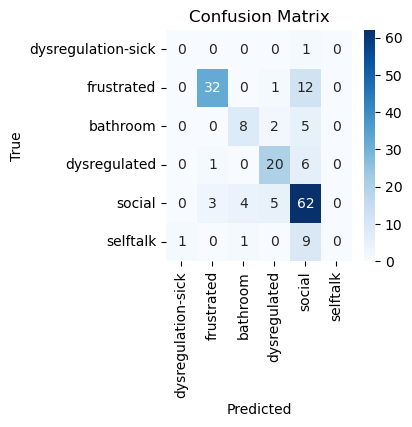

In [57]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Extract unique class labels from the 'Label' column
class_labels = firsthunderd['Label'].unique()

# Convert class labels to a list
class_labels = list(class_labels)



# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred_labels)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


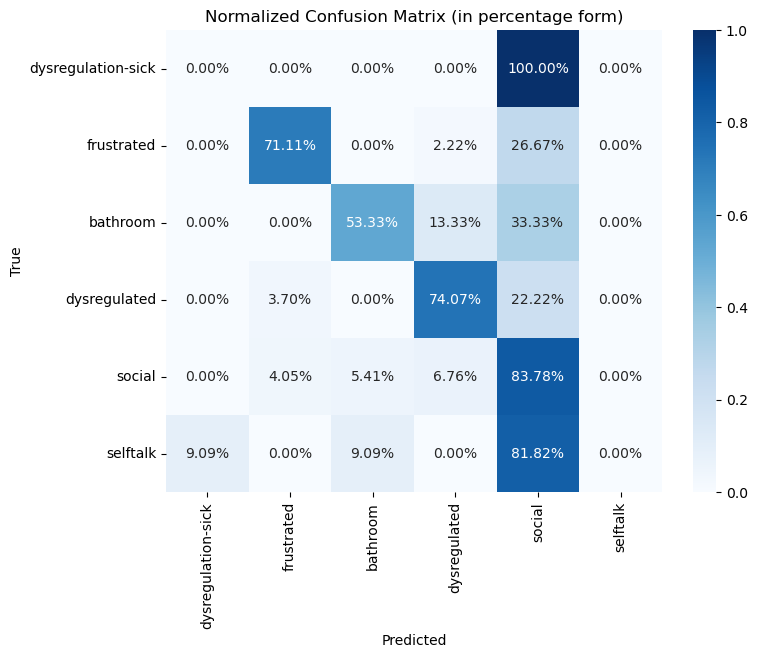

In [58]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already calculated the confusion matrix as 'confusion'
# The matrix is expected to be in the format returned by the confusion_matrix function

# Calculate the sum of true positives, true negatives, false positives, and false negatives for each class
class_sums = np.sum(confusion, axis=1)

# Normalize the confusion matrix by dividing each entry by the respective class sum
normalized_confusion = confusion / class_sums[:, np.newaxis]

# Extract unique class labels from the 'Label' column
class_labels = firsthunderd['Label'].unique()

# Convert class labels to a list
class_labels = list(class_labels)

# Create a heatmap to visualize the normalized confusion matrix (in percentage form)
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_confusion, annot=True, fmt='.2%', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix (in percentage form)')
plt.show()


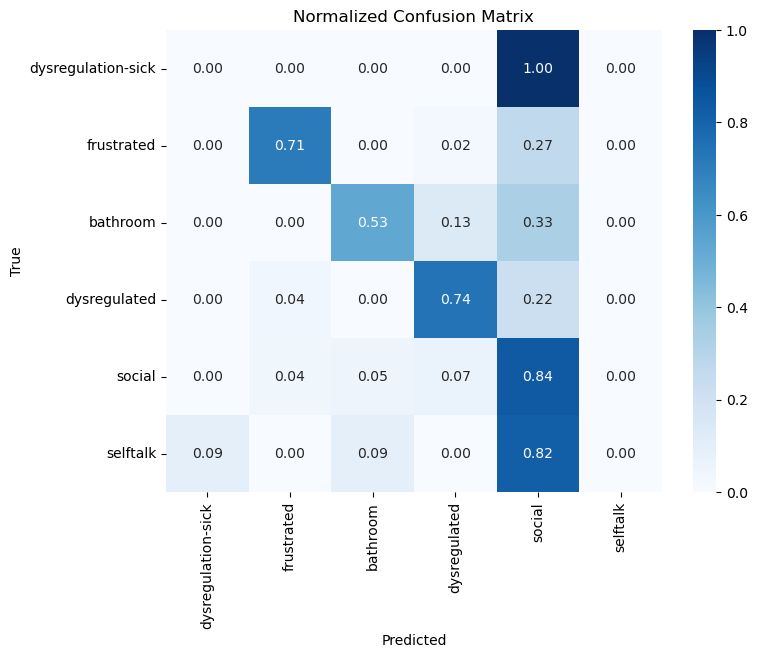

In [59]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already calculated the confusion matrix as 'confusion'
# The matrix is expected to be in the format returned by the confusion_matrix function

# Calculate the sum of true positives, true negatives, false positives, and false negatives for each class
class_sums = np.sum(confusion, axis=1)

# Normalize the confusion matrix by dividing each entry by the respective class sum
normalized_confusion = confusion / class_sums[:, np.newaxis]

# Extract unique class labels from the 'Label' column
class_labels = firsthunderd['Label'].unique()

# Convert class labels to a list
class_labels = list(class_labels)

# Create a heatmap to visualize the normalized confusion matrix (without percentages)
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_confusion, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()


In [60]:
#


model = models.Sequential([
    layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    layers.Conv1D(64, 3, activation='relu', padding='same'),
    layers.BatchNormalization(),  # Example batch normalization layer
    layers.MaxPooling1D(2),
    layers.Conv1D(128, 3, activation='relu', padding='same'),
    layers.BatchNormalization(),  # Example batch normalization layer
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')  # Two output classes
])


In [69]:
##hyper parameter tuning

In [64]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch


In [83]:
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)))
    
    # Tune the number of filters for Conv1D
    hp_filters = hp.Int('filters', min_value=32, max_value=128, step=32)
    model.add(layers.Conv1D(hp_filters, 3, activation='relu'))
    
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Flatten())
    
    # Tune the number of units in the Dense layer
    hp_units = hp.Int('units', min_value=32, max_value=128, step=32)
    model.add(layers.Dense(hp_units, activation='relu'))
    
    model.add(layers.Dense(6, activation='softmax'))
    
    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',  # Choose the metric to optimize
    max_trials=10,  # Number of hyperparameter combinations to try
    directory='my_tuning_dir2',  # Directory to store results
    project_name='audio_classification'
)
tuner.search(X_train, y_train,
             epochs=10,
             validation_split=0.1,
             batch_size=42)
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = build_model(best_hp)


Trial 10 Complete [00h 00m 08s]
val_accuracy: 0.7285714149475098

Best val_accuracy So Far: 0.7571428418159485
Total elapsed time: 00h 01m 21s


In [84]:
best_model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=16)


Epoch 1/10
39/39 [==============================] - 2s 26ms/step - loss: 2.5779 - accuracy: 0.4090 - val_loss: 1.3728 - val_accuracy: 0.5571
Epoch 2/10
39/39 [==============================] - 0s 9ms/step - loss: 1.4288 - accuracy: 0.5185 - val_loss: 1.0669 - val_accuracy: 0.5571
Epoch 3/10
39/39 [==============================] - 0s 8ms/step - loss: 1.2971 - accuracy: 0.5604 - val_loss: 1.1107 - val_accuracy: 0.5857
Epoch 4/10
39/39 [==============================] - 0s 9ms/step - loss: 1.1837 - accuracy: 0.5910 - val_loss: 0.8758 - val_accuracy: 0.7000
Epoch 5/10
39/39 [==============================] - 0s 9ms/step - loss: 1.0722 - accuracy: 0.6103 - val_loss: 0.9130 - val_accuracy: 0.7000
Epoch 6/10
39/39 [==============================] - 0s 9ms/step - loss: 1.0662 - accuracy: 0.6087 - val_loss: 0.8498 - val_accuracy: 0.7000
Epoch 7/10
39/39 [==============================] - 0s 9ms/step - loss: 0.9696 - accuracy: 0.6570 - val_loss: 0.8115 - val_accuracy: 0.7000
Epoch 8/10
39/39 [=

In [85]:
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")


6/6 [==============================] - 0s 4ms/step - loss: 0.8061 - accuracy: 0.7399
Test accuracy: 0.7398843765258789


In [70]:
import numpy as np

# Assuming you have already trained your best_model
y_pred_probabilities = best_model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probabilities, axis=1)


6/6 [==============================] - 0s 3ms/step


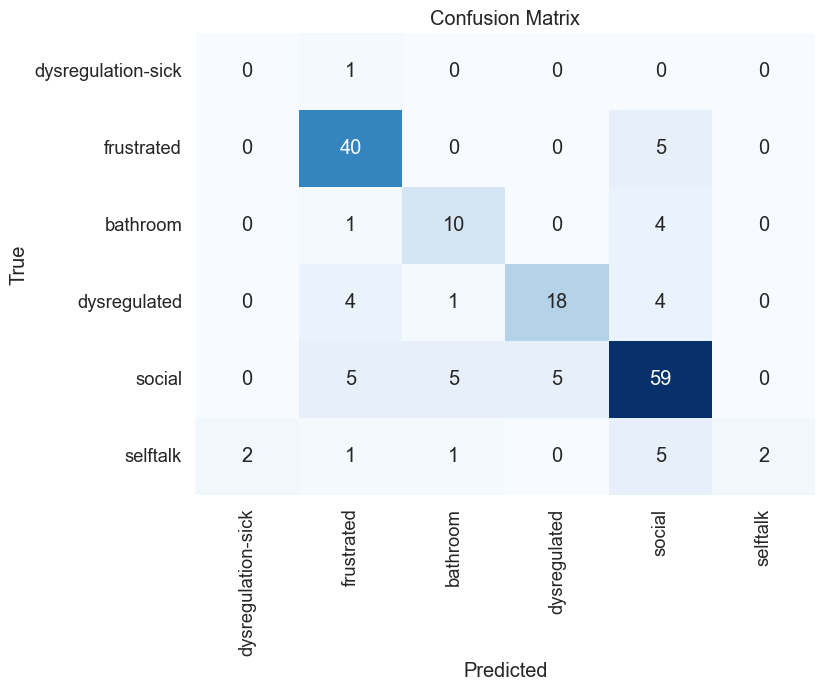

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred_labels)

# Define class labels (replace with your actual class labels)
class_labels = firsthunderd['Label'].unique()

# Convert class labels to a list
class_labels = list(class_labels)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


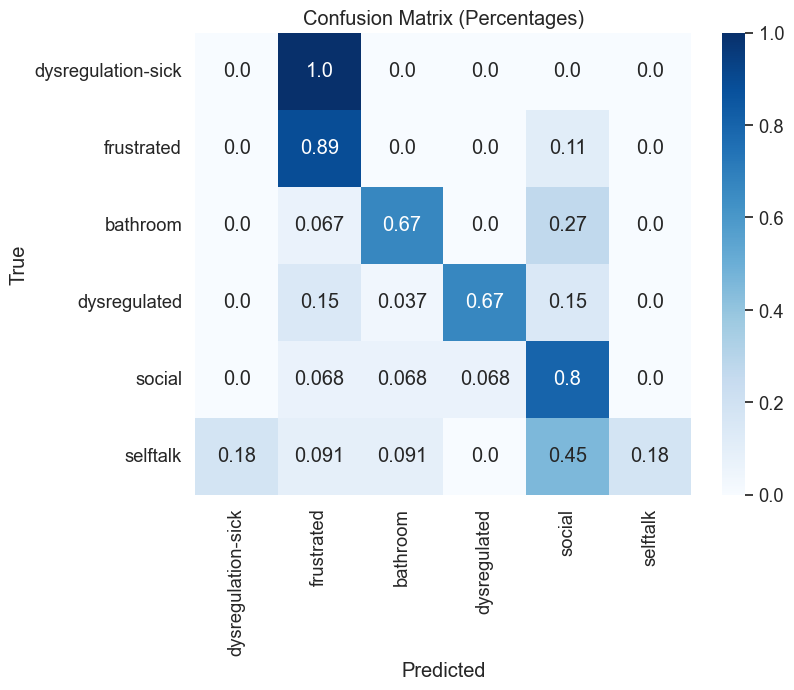

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred_labels)

# Calculate percentages for each cell
confusion_percent = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

# Define class labels (replace with your actual class labels)
class_labels = firsthunderd['Label'].unique()

# Convert class labels to a list
class_labels = list(class_labels)

# Create a heatmap of the confusion matrix with percentages
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_percent, annot=True, fmt='.2', cmap='Blues', cbar=True,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Percentages)')
plt.show()


In [81]:
print(y_test.shape)

(173,)
